In [1]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

In [2]:
today = dt.date.today()
print(today)
date_choice = dt.date.today() - dt.timedelta(days = 1)
print(date_choice)

2021-04-02
2021-04-01


In [3]:
fname = 'Json/reg_name.json'
with open(fname, 'r') as file:
    reg_name = json.loads(file.read())
reg_name['11']

'Île-de-France'

In [4]:
three_class = {0: 'whole',
               9: '0-19',
               19: '0-19',
               29: '20-59',
               39: '20-59',
               49: '20-59',
               59: '20-59',
               69: '60+',
               79: '60+',
               89: '60+',
               90: '60+',
              }

In [5]:
fname = 'Json/reg_3C_pop.json'
with open(fname, 'r') as file:
    reg_3C_pop = json.loads(file.read())
reg_3C_pop['Outre-mer']['60+']

424767

In [6]:
reg_3C_pop['France entiere']

{'0-19': 16099691, '20-59': 33157720, '60+': 17857583, 'whole': 67114995}

In [7]:
date = date_choice.strftime("%Y-%m-%d")
date_text = date_choice.strftime("%d/%M/%Y")

In [8]:
path = '../Data/donnees-hospitalieres-classe-age-covid19-{}-??h??.csv'.format(date)
path = glob.glob(path)
path
fname_temp = './Temp' + path[0][7:-4]
fname_temp

'./Temp/donnees-hospitalieres-classe-age-covid19-2021-04-01-18h03'

In [9]:
fname_temp = './Temp' + path[0][7:-4]
fname_temp

'./Temp/donnees-hospitalieres-classe-age-covid19-2021-04-01-18h03'

In [10]:
fname_output = '../Output' + path[0][7:-4]
fname_output

'../Output/donnees-hospitalieres-classe-age-covid19-2021-04-01-18h03'

In [11]:
with open(path[0],'r') as f:
    d = pd.read_csv(f, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
d.sample(3)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
46593,11,79,2020-11-08,1503,335,NaN,NaN,NaN,7485,2190
20397,1,29,2020-06-29,0,0,NaN,NaN,NaN,1,0
42223,6,49,2020-10-17,2,1,NaN,NaN,NaN,60,4


In [12]:
d.dtypes

reg                  int64
cl_age90             int64
jour        datetime64[ns]
hosp                 int64
rea                  int64
HospConv           float64
SSR_USLD           float64
autres             float64
rad                  int64
dc                   int64
dtype: object

In [13]:
d.describe()

,reg,cl_age90,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
count,75240.000000,75240.000000,75240.000000,75240.00000,3762.000000,3762.000000,3762.000000,75240.000000,75240.000000
mean,39.388889,48.272727,183.591414,25.43651,145.670388,73.102871,3.311271,1271.900890,302.781938
std,32.287362,30.265966,591.769666,92.91046,366.837097,184.333450,9.646952,4074.826803,1020.804528
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,19.000000,2.000000,0.00000,3.000000,0.000000,0.000000,34.000000,0.000000
50%,30.000000,49.000000,12.000000,1.00000,18.000000,3.000000,0.000000,185.000000,7.000000
75%,75.000000,79.000000,105.000000,11.00000,124.000000,60.000000,3.000000,859.000000,118.000000
max,94.000000,90.000000,13209.000000,2668.00000,3959.000000,1775.000000,120.000000,76092.000000,16847.000000


In [14]:
d.reg.unique().shape

(18,)

In [15]:
reg_name['7'] = 'Outre-mer'
reg_name

{'1': 'Guadeloupe',
 '2': 'Martinique',
 '3': 'Guyane',
 '4': 'La Réunion',
 '6': 'Mayotte',
 '11': 'Île-de-France',
 '24': 'Centre-Val de Loire',
 '27': 'Bourgogne-Franche-Comté',
 '28': 'Normandie',
 '32': 'Hauts-de-France',
 '44': 'Grand Est',
 '52': 'Pays de la Loire',
 '53': 'Bretagne',
 '75': 'Nouvelle-Aquitaine',
 '76': 'Occitanie',
 '84': 'Auvergne-Rhône-Alpes',
 '93': "Provence-Alpes-Côte d'Azur",
 '94': 'Corse',
 '7': 'Outre-mer'}

In [16]:
d.reg = d.reg.map(lambda x: str(x) )

In [17]:
d['reg']

0         1
1         1
2         1
3         1
4         1
         ..
75235    94
75236    94
75237    94
75238    94
75239    94
Name: reg, Length: 75240, dtype: object

In [18]:
d.reg = d.reg.replace({'1':'7',
              '2':'7',
              '3':'7',
              '4':'7',
              '6':'7',
              })

In [19]:
d.reg = d.reg.map(lambda x: reg_name[x])

In [20]:
d.head(3)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,Outre-mer,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,Outre-mer,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,Outre-mer,19,2020-03-18,0,0,NaN,NaN,NaN,0,0


In [21]:
regs = d['reg'].unique()
ages = d['cl_age90'].unique()

In [22]:
d['three_class'] = d['cl_age90'].map(lambda x: three_class[x])
d.sample(3)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc,three_class
36022,Provence-Alpes-Côte d'Azur,79,2020-09-15,156,45,NaN,NaN,NaN,1200,220,60+
6071,Pays de la Loire,90,2020-04-17,129,0,NaN,NaN,NaN,29,72,60+
8631,Grand Est,69,2020-04-30,677,198,NaN,NaN,NaN,1637,300,60+


In [23]:
dg = d.groupby(['reg', 'jour', 'three_class']).agg([sum])
dg.sample(3)

,,,cl_age90,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
,,,sum,sum,sum,sum,sum,sum,sum,sum
reg,jour,three_class,,,,,,,,
Corse,2021-02-25,whole,0,94,10,0.0,0.0,0.0,618,144
Occitanie,2020-09-21,whole,0,317,82,0.0,0.0,0.0,3488,567
Outre-mer,2020-05-28,whole,0,116,19,0.0,0.0,0.0,567,52


In [24]:
dg = (dg.reset_index()
      .drop(columns = ['cl_age90'])
            )
dg.sample(3)

/home/edmz/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,reg,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
,,,,sum,sum,sum,sum,sum,sum,sum
20748,Île-de-France,2020-11-20,0-19,59,9,0.0,0.0,0.0,965,6
12484,Nouvelle-Aquitaine,2020-06-07,0-19,2,0,0.0,0.0,0.0,26,0
1352,Auvergne-Rhône-Alpes,2021-02-19,0-19,15,3,0.0,0.0,0.0,508,0


In [25]:
dg.tail(3)

,reg,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
,,,,sum,sum,sum,sum,sum,sum,sum
21277,Île-de-France,2021-04-01,20-59,1865,543,1118.0,147.0,57.0,26390,1293
21278,Île-de-France,2021-04-01,60+,5402,1002,2757.0,1606.0,37.0,47308,15440
21279,Île-de-France,2021-04-01,whole,7385,1560,3959.0,1767.0,99.0,76092,16847


In [26]:
fname = fname_temp + '-reg3C.csv'
dg.to_csv(fname, sep = ';', index = False)

In [27]:
with open(path[0],'r') as f:
    d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str}, skiprows = [1])
d.sample(3)

,reg,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
1667,Bourgogne-Franche-Comté,2020-04-23,whole,1283,217,0.0,0.0,0.0,2088,753
4085,Bretagne,2020-12-04,20-59,56,13,0.0,0.0,0.0,849,18
10391,Hauts-de-France,2021-01-29,whole,2535,285,0.0,0.0,0.0,20567,5262


In [28]:
regs = d['reg'].unique()
three_class = d['three_class'].unique()

In [29]:
d.columns

Index(['reg', 'jour', 'three_class', 'hosp', 'rea', 'HospConv', 'SSR_USLD',
       'autres', 'rad', 'dc'],
      dtype='object')

In [30]:
d['taux hosp'] = d.apply(lambda x: x['hosp'] / reg_3C_pop[ x['reg']][ x['three_class'] ] * 100000, axis = "columns")
d['taux rea'] = d.apply(lambda x: x['rea'] / reg_3C_pop[ x['reg']][ x['three_class'] ] * 100000, axis = "columns")

In [31]:
d

,reg,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc,taux hosp,taux rea
0,Auvergne-Rhône-Alpes,2020-03-18,0-19,1,0,0.0,0.0,0.0,3,0,0.051540,0.000000
1,Auvergne-Rhône-Alpes,2020-03-18,20-59,36,11,0.0,0.0,0.0,36,1,0.904406,0.276346
2,Auvergne-Rhône-Alpes,2020-03-18,60+,127,24,0.0,0.0,0.0,30,6,6.014371,1.136574
3,Auvergne-Rhône-Alpes,2020-03-18,whole,172,35,0.0,0.0,0.0,69,7,2.141334,0.435737
4,Auvergne-Rhône-Alpes,2020-03-19,0-19,2,1,0.0,0.0,0.0,3,0,0.103079,0.051540
...,...,...,...,...,...,...,...,...,...,...,...,...
21275,Île-de-France,2021-03-31,whole,7321,1532,3915.0,1775.0,99.0,75718,16761,59.625955,12.477389
21276,Île-de-France,2021-04-01,0-19,34,2,23.0,4.0,5.0,1531,7,1.082470,0.063675
21277,Île-de-France,2021-04-01,20-59,1865,543,1118.0,147.0,57.0,26390,1293,28.171303,8.202154
21278,Île-de-France,2021-04-01,60+,5402,1002,2757.0,1606.0,37.0,47308,15440,214.617766,39.808775


In [32]:
fname = fname_temp + '-reg3C-processed.csv'
d.to_csv(fname, sep = ';', index = False)

# National

In [33]:
fname = fname_temp + '-reg3C.csv'
d = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'P': int, 'T': int},
                skiprows = [1])
d.sample(3)

,reg,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
3512,Bretagne,2020-07-14,0-19,1,0,0.0,0.0,0.0,20,0
7940,Grand Est,2020-06-11,0-19,14,1,0.0,0.0,0.0,220,1
3017,Bourgogne-Franche-Comté,2021-03-27,20-59,173,25,98.0,28.0,22.0,3358,131


In [34]:
dg = (d.groupby(['jour', 'three_class'])
      .agg([sum])
      .drop(columns = ['reg'])
      .reset_index()
     )
dg.sample(3)

,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
,,,sum,sum,sum,sum,sum,sum,sum
1255,2021-01-25,whole,26888,3031,0.0,0.0,0.0,217677,51492
1285,2021-02-02,20-59,3438,716,0.0,0.0,0.0,65085,2530
1071,2020-12-10,whole,25199,2949,0.0,0.0,0.0,174627,39301


In [35]:
fname = fname_temp + '-nat.csv'
dg.to_csv(fname, sep = ';', index = False)

In [36]:
d = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'P': int, 'T': int},
                skiprows = [1])
d.sample(3)

,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
405,2020-06-27,20-59,1502,190,0.0,0.0,0.0,25085,1260
328,2020-06-08,0-19,76,13,0.0,0.0,0.0,1148,6
378,2020-06-20,60+,7990,470,0.0,0.0,0.0,47856,17793


In [37]:
d = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                skiprows = [1])
d.sample(3)

,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
1345,2021-02-17,20-59,3425,788,0.0,0.0,0.0,69471,2702
851,2020-10-16,whole,10021,1791,0.0,0.0,0.0,104665,22367
530,2020-07-28,60+,4408,239,0.0,0.0,0.0,52756,18280


In [38]:
d['taux hosp'] = d.apply(lambda x: x['hosp'] / reg_3C_pop[ 'France entiere'][ x['three_class'] ] * 100000, axis = "columns")
d['taux rea'] = d.apply(lambda x: x['rea'] / reg_3C_pop[ 'France entiere'][ x['three_class'] ] * 100000, axis = "columns")

In [39]:
fname = fname_temp + '-nat3C-processed.csv'
d.to_csv(fname, sep = ';', index = False)

# Graphs

In [40]:
fname = fname_temp + '-reg3C-processed.csv'
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d.sample(3)

,reg,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc,taux hosp,taux rea
10318,Hauts-de-France,2021-01-11,60+,2020,185,0.0,0.0,0.0,12931,4482,137.313522,12.575743
7163,Corse,2020-12-13,whole,28,6,0.0,0.0,0.0,488,113,8.123500,1.740750
11607,Normandie,2020-11-14,whole,1373,165,0.0,0.0,0.0,3690,894,41.561980,4.994703


In [41]:
fname = fname_temp + '-nat3C-processed.csv'
dnat = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
dnat.sample(3)

,jour,three_class,hosp,rea,HospConv,SSR_USLD,autres,rad,dc,taux hosp,taux rea
17,2020-03-22,20-59,1918,569,0.0,0.0,0.0,1109,28,5.784475,1.716041
699,2020-09-08,whole,4942,568,0.0,0.0,0.0,88196,20265,7.363481,0.846309
222,2020-05-12,60+,17936,1704,0.0,0.0,0.0,34801,15805,100.439124,9.542165


In [42]:
regs = d['reg'].unique()
three_class = d['three_class'].unique()

In [43]:
def format_graph(ax, index, ymin, ymax, title, date):
    
    ax.patch.set_alpha(0)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_ylim(ymin, ymax)
    ax.grid(axis = 'y')
    ax.tick_params(axis='y', left = False, labelsize = 10)
    
    ax.set_xlim(dt.datetime(2020, 3, 1), dt.datetime(2021, 6, 1))
    
    
    ax.axvline(dt.datetime(2021, 1, 1), 
               ymin = 0, ymax = 0.9, 
               c = 'black', 
               linewidth = 0.5,
               linestyle = '--')
    
    if index == 0:
        (ax.legend(bbox_to_anchor=[1.55, .45], 
              loc='center',
              labelspacing=0.5,       
              handlelength=2, 
              handletextpad=0.5,
              frameon=True,
              fontsize = 14,
              title = title.format(date),
              title_fontsize = 14,
              )
        )
        plt.setp(ax.get_legend().get_title(), multialignment='center')
        
        ax.tick_params(axis='x', bottom = True,
                   labelsize = 9)
        locs = []
        for i in range(16):
            locs.append(dt.datetime(2020, 3 + i , 1) if i <= 9 
                        else dt.datetime(2021, i - 9, 1))
        labels = ['mars','avril', 'mai', 'juin', 'juil.', 
                 'août', 'sept.', 'oct.', 'nov.', 'déc.', 
                 'janv.', 'fév.', 'mars', 'avril', 
                  'mai', 'juin']
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    else:
        ax.tick_params(axis='x', bottom = False)
        ax.set_xticklabels([])
        
    if index % 4 != 0:
        ax.set_yticklabels([])
        

In [44]:
def produce_fig(ymin, ymax, column_to_plot, main_color, title, extension):


    fig, axs = plt.subplots(4, 4, figsize = (16,12))
    axs = axs.ravel()


    ax = axs[0]

    dplot = dnat.loc[dnat.three_class == '0-19']
    ax.plot(dplot.jour, dplot[column_to_plot], c = main_color, linewidth = 4, label = '0-19')

    dplot = dnat.loc[dnat.three_class == '20-59']
    ax.plot(dplot.jour, dplot[column_to_plot], c = "black", linewidth = 2, label = '20-59')

    dplot = dnat.loc[dnat.three_class == '60+']
    ax.plot(dplot.jour, dplot[column_to_plot], c = "firebrick", linewidth = 1, label = '60+')


    format_graph(ax, 0, ymin, ymax, title, date)
    ax.set_title('France entière', x = 0.02, y = 0.88, loc = 'left', 
                 fontsize = 18, c = 'royalblue', fontweight='semibold')

    ax = axs[1]
    ax.set_axis_off() 


    for i, reg in enumerate(regs):

        ax = axs[i+2]

        dplot = d.loc[d.reg == reg].loc[d.three_class == '0-19']
        ax.plot(dplot.jour, dplot[column_to_plot], c = main_color, linewidth = 4)

        dplot = d.loc[d.reg == reg].loc[d.three_class == '20-59']
        ax.plot(dplot.jour, dplot[column_to_plot], linewidth = 2, c = "black")

        dplot = d.loc[d.reg == reg].loc[d.three_class == '60+']
        ax.plot(dplot.jour, dplot[column_to_plot], c = "firebrick", linewidth = 1, label = '60+')


        format_graph(ax, i+2, ymin, ymax, title, date)

        ax.set_title(reg, x = 0.02, y = -0.15, loc = 'left', 
                     fontsize = 14, c = 'royalblue', fontweight='normal', family = 'sans')


    fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.2)

    fname = fname_output + extension
    fig.savefig(fname, pad_inches = 0)

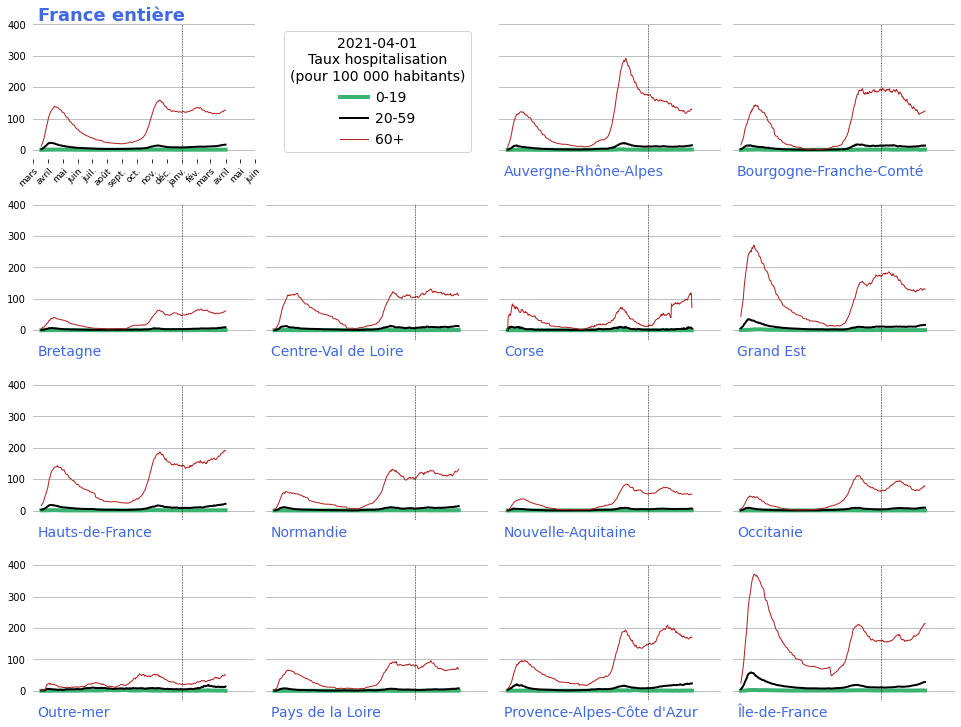

In [45]:
produce_fig(ymin = -30,
    ymax = 449,
    column_to_plot = "taux hosp",
    main_color = "mediumseagreen",
    title = '{}\nTaux hospitalisation\n(pour 100 000 habitants)',
    extension = 'fig-hosp.pdf',)

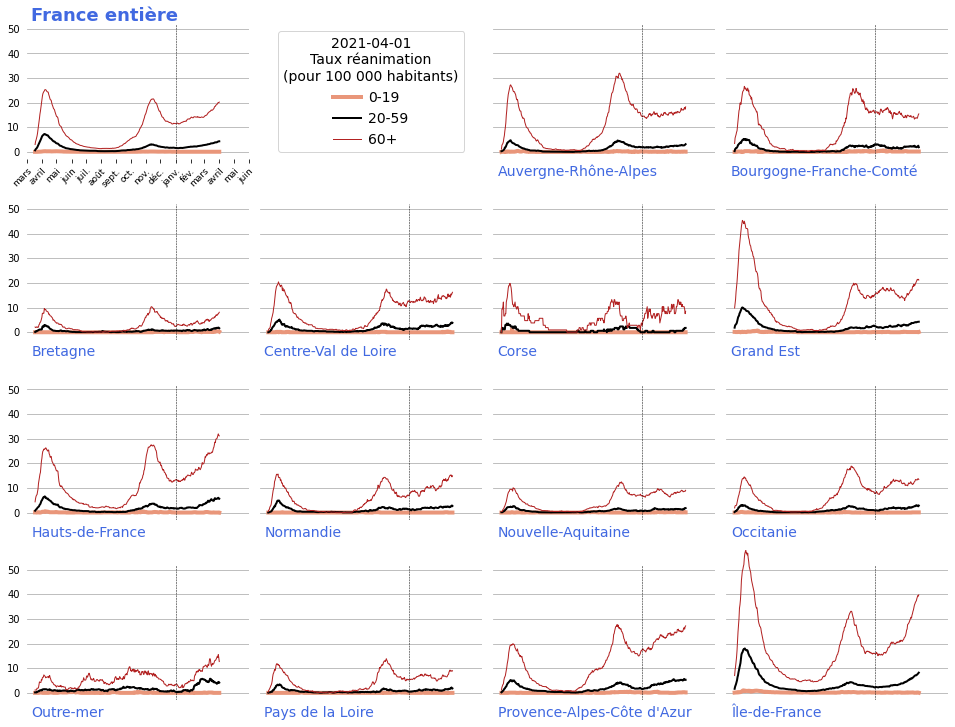

In [46]:
produce_fig(ymin = -3,
    ymax = 58,
    column_to_plot = "taux rea",
    main_color = "darksalmon",
    title = '{}\nTaux réanimation\n(pour 100 000 habitants)',
    extension = 'fig-rea.pdf',)